In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Create DataLoader for training and testing data
train_dataset = TensorDataset(X_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Create the autoencoder
autoencoder = nn.Sequential(
    nn.Linear(X_train.shape[1], 100),
    nn.ReLU(),
    nn.Linear(100, X_train.shape[1]),
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)

# Train the autoencoder
num_epochs = 1000
for epoch in range(num_epochs):
    autoencoder.train()
    for batch_X, _ in train_loader:  # Add an underscore to ignore the labels
        optimizer.zero_grad()
        reconstructions = autoencoder(batch_X)
        loss = criterion(reconstructions, batch_X)
        loss.backward()
        optimizer.step()

# Test the autoencoder
autoencoder.eval()
reconstruction_errors = []
epistemic_uncertainty = []
with torch.no_grad():
    for batch_X, in test_loader:
        reconstructions = autoencoder(batch_X)
        reconstruction_errors.append(torch.mean(torch.abs(reconstructions - batch_X)).item())
        epistemic_uncertainty.append(torch.var(reconstructions).item())

# Calculate the aleatoric uncertainty
aleatoric_uncertainty = np.mean(reconstruction_errors)

# Calculate the Pearson correlation
pearson_correlation = np.corrcoef(reconstruction_errors, epistemic_uncertainty)[0, 1]

# Plot the results
plt.figure()
plt.plot(reconstruction_errors, label="Reconstruction error")
plt.plot(epistemic_uncertainty, label="Epistemic uncertainty")
plt.axhline(y=aleatoric_uncertainty, color='r', linestyle='--', label="Aleatoric uncertainty")
plt.legend()
plt.show()

print(f"Aleatoric uncertainty: {aleatoric_uncertainty}")
print(f"Epistemic uncertainty: {np.mean(epistemic_uncertainty)}")
print(f"Pearson correlation: {pearson_correlation}")


ValueError: not enough values to unpack (expected 2, got 1)

In [2]:
import torch
from torch import nn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_train.shape[1], 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8))
        
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, X_train.shape[1]))
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the autoencoder model and define the loss function and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the autoencoder model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, X_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Calculate the reconstruction error for all samples in the test set
reconstruction_errors = []
for sample in X_test:
    reconstruction = model(sample)
    reconstruction_error = criterion(reconstruction, sample)
    reconstruction_errors.append(reconstruction_error.item())

# Calculate the mean and standard deviation of the reconstruction errors
mean_reconstruction_error = sum(reconstruction_errors) / len(reconstruction_errors)
std_reconstruction_error = (sum((x - mean_reconstruction_error) ** 2 for x in reconstruction_errors) / len(reconstruction_errors)) ** 0.5

print(f"Mean reconstruction error: {mean_reconstruction_error:.4f}")
print(f"Standard deviation of reconstruction errors: {std_reconstruction_error:.4f}")

Mean reconstruction error: 0.4706
Standard deviation of reconstruction errors: 0.4840


tensor(0.0702, grad_fn=<MseLossBackward0>)


Accuracy: 0.956140350877193


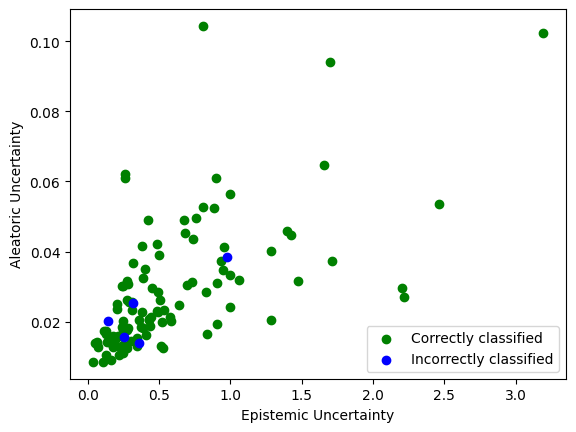

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

# Create DataLoader for training and testing data
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, torch.zeros(X_test.shape[0]))  # Create a tensor of zeros with the same length as X_test for the labels, since they're not needed here.
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Create the autoencoder
autoencoder = nn.Sequential(
    nn.Linear(X_train.shape[1], 100),
    nn.ReLU(),
    nn.Linear(100, X_train.shape[1]),
)

# Define the loss function and optimizer for the autoencoder
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)

# Train the autoencoder
num_epochs = 1000
for epoch in range(num_epochs):
    autoencoder.train()
    for batch_X, _ in train_loader:  # Add an underscore to ignore the labels
        optimizer.zero_grad()
        reconstructions = autoencoder(batch_X)
        loss = criterion(reconstructions, batch_X)
        loss.backward()
        optimizer.step()

# Create a simple classifier
classifier = nn.Sequential(
    nn.Linear(X_train.shape[1], 100),
    nn.ReLU(),
    nn.Linear(100, 2),
)

# Define the loss function and optimizer for the classifier
classifier_criterion = nn.CrossEntropyLoss()
classifier_optimizer = optim.Adam(classifier.parameters(), lr=0.01)

# Train the classifier
num_epochs = 1000
for epoch in range(num_epochs):
    classifier.train()
    for batch_X, batch_y in train_loader:
        classifier_optimizer.zero_grad()
        predictions = classifier(batch_X)
        loss = classifier_criterion(predictions, batch_y)
        loss.backward()
        classifier_optimizer.step()


# Test the classifier
classifier.eval()
y_pred = []
with torch.no_grad():
    for batch_X, _ in test_loader:  # Add an underscore to ignore the labels
        predictions = classifier(batch_X)
        _, predicted_labels = torch.max(predictions, 1)
        y_pred.extend(predicted_labels.numpy())
y_pred = np.array(y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the epistemic and aleatoric uncertainties
epistemic_uncertainty = []
aleatoric_uncertainty = []
correct_classification = []
with torch.no_grad():
    for x, true_label, pred_label in zip(X_test, y_test, y_pred):
        x = x.unsqueeze(0)
        reconstructions = autoencoder(x)
        epistemic_uncertainty.append(torch.var(reconstructions).item())
        aleatoric_uncertainty.append(torch.mean(torch.abs(reconstructions - x)).item())
        correct_classification.append(true_label == pred_label)

# Visualize the uncertainty distributions
correct_indices = [i for i, correct in enumerate(correct_classification) if correct]
incorrect_indices = [i for i, correct in enumerate(correct_classification) if not correct]

plt.figure()
plt.scatter(np.array(epistemic_uncertainty)[correct_indices], np.array(aleatoric_uncertainty)[correct_indices], color='green', label='Correctly classified')
plt.scatter(np.array(epistemic_uncertainty)[incorrect_indices], np.array(aleatoric_uncertainty)[incorrect_indices], color='blue', label='Incorrectly classified')
plt.xlabel('Epistemic Uncertainty')
plt.ylabel('Aleatoric Uncertainty')
plt.legend()
plt.show()
